<a href="https://colab.research.google.com/github/saipragna25/deep-learning-vision-classifiers-assignment/blob/main/DL_Vision_classifiers_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Xray pnemonea classification with convnet

In [23]:
import os

base_dir = '/content/drive/MyDrive/chest_xray'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')

test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

train_NORMAL_fnames = os.listdir(train_NORMAL_dir)
train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)

validation_NORMAL_fnames = os.listdir(validation_NORMAL_dir)
validation_PNEUMONIA_fnames = os.listdir(validation_PNEUMONIA_dir)

test_NORMAL_fnames = os.listdir(test_NORMAL_dir)
test_PNEUMONIA_fnames = os.listdir(test_PNEUMONIA_dir)

n_train = len(train_NORMAL_fnames) + len(train_PNEUMONIA_fnames)
n_validation = len(validation_NORMAL_fnames) + len(validation_PNEUMONIA_fnames)
n_test = len(test_NORMAL_fnames) + len(test_PNEUMONIA_fnames)

print(n_train, n_validation, n_test)

5233 16 624


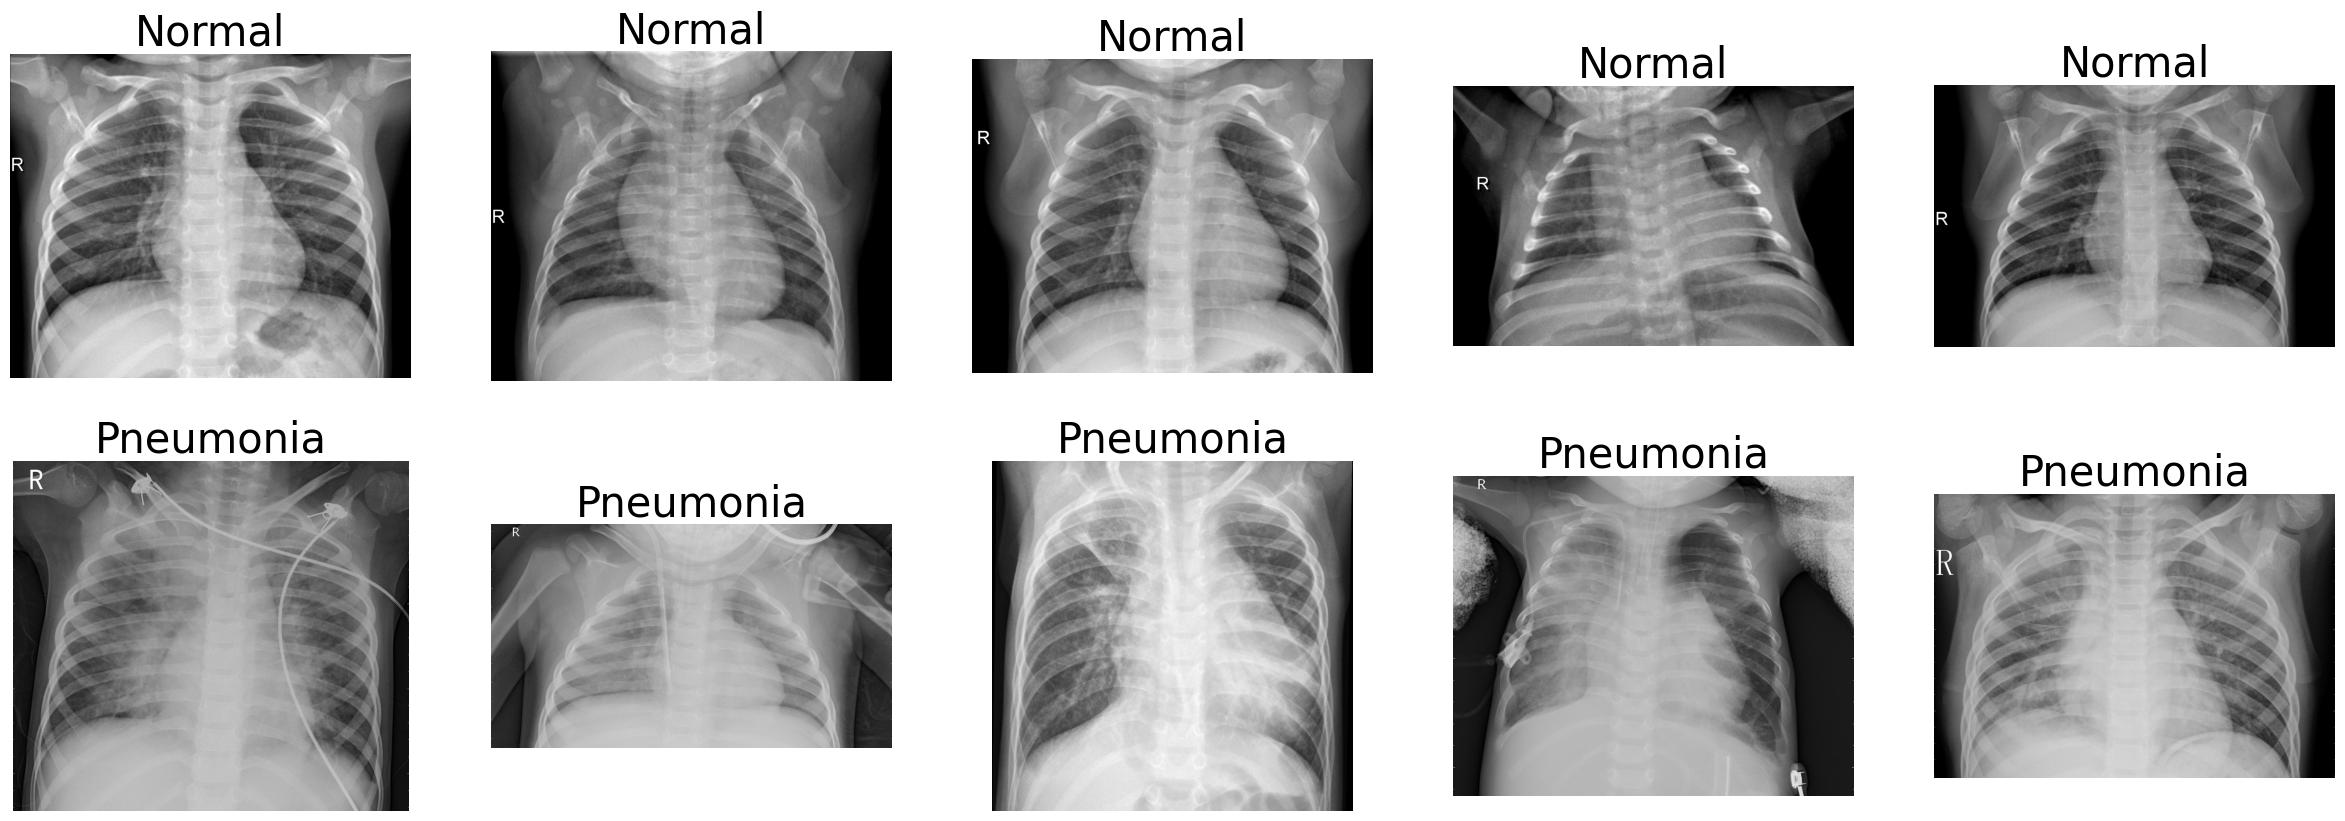

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(0,5):
    img = plt.imread(os.path.join(train_NORMAL_dir, train_NORMAL_fnames[i]))
    ax[0,i].imshow(img, cmap='gray')
    ax[0,i].axis('off')
    ax[0,i].set_title('Normal', fontsize=30)
    
for i in range(0,5):
    img = plt.imread(os.path.join(train_PNEUMONIA_dir, train_PNEUMONIA_fnames[i]))
    ax[1,i].imshow(img, cmap='gray')
    ax[1,i].axis('off')
    ax[1,i].set_title('Pneumonia', fontsize=30)
    
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   zoom_range = 0.2, 
                                   width_shift_range=0.1,  
                                   height_shift_range=0.1)

validation_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                         samplewise_center=True,
                                         samplewise_std_normalization=True, 
                                         zoom_range = 0.2, 
                                         width_shift_range=0.1,  
                                         height_shift_range=0.1)

test_datagen  = ImageDataGenerator(rescale = 1.0/255,
                                    samplewise_center=True,
                                    samplewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(160, 160))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=16,
                                                              class_mode='binary',
                                                              target_size=(160, 160))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  class_mode='binary',
                                                  target_size=(160, 160))

Found 5232 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential(name='X-ray_CNN')

model.add(tf.keras.layers.InputLayer(input_shape=(160,160,3)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

METRICS = ['accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)
history = model.fit(train_generator, 
          steps_per_epoch= n_train//16,
          validation_data=validation_generator,
          epochs=5,
          verbose=1)
model.summary()

Epoch 1/5
327/327 [==============================] - 1386s 4s/step - loss: 0.2728 - accuracy: 0.8941 - precision: 0.9202 - recall: 0.9387 - val_loss: 1.5180 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/5
327/327 [==============================] - 560s 2s/step - loss: 0.1832 - accuracy: 0.9262 - precision: 0.9468 - recall: 0.9542 - val_loss: 1.1564 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/5
327/327 [==============================] - 558s 2s/step - loss: 0.1576 - accuracy: 0.9411 - precision: 0.9596 - recall: 0.9611 - val_loss: 1.3468 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/5
327/327 [==============================] - 557s 2s/step - loss: 0.1465 - accuracy: 0.9413 - precision: 0.9589 - recall: 0.9621 - val_loss: 0.9673 - val_accuracy: 0.6250 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/5
327/327 [==============================] - 545s 2s/step - loss: 0.1435 - accuracy: 0.9465 - p

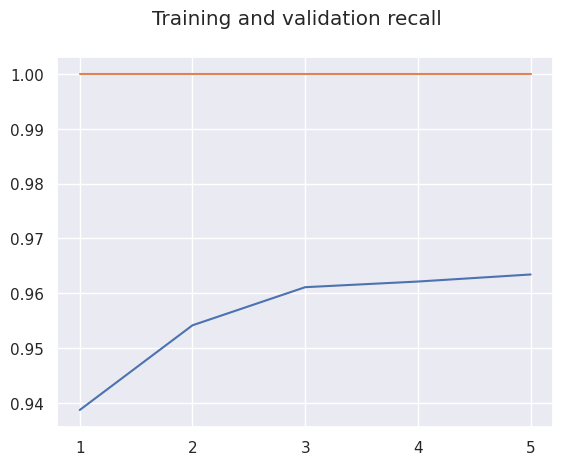

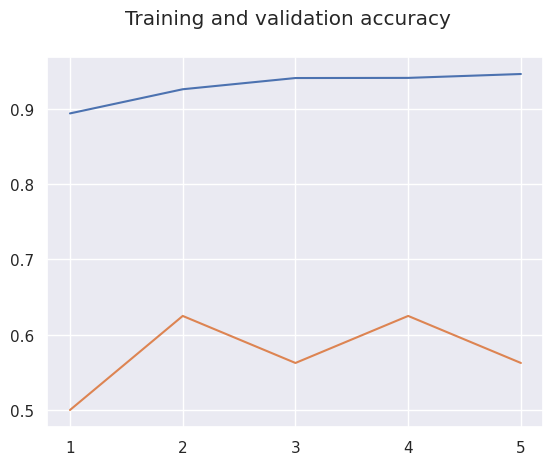

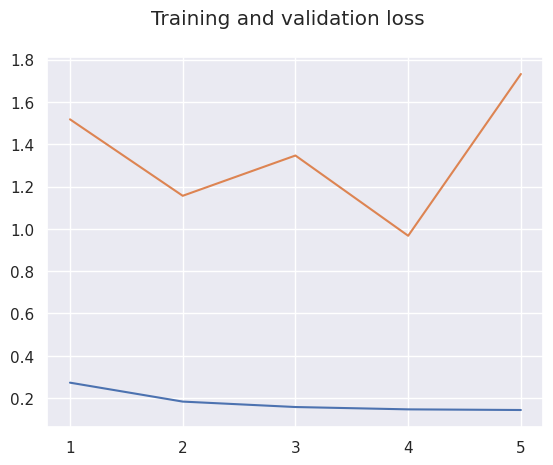

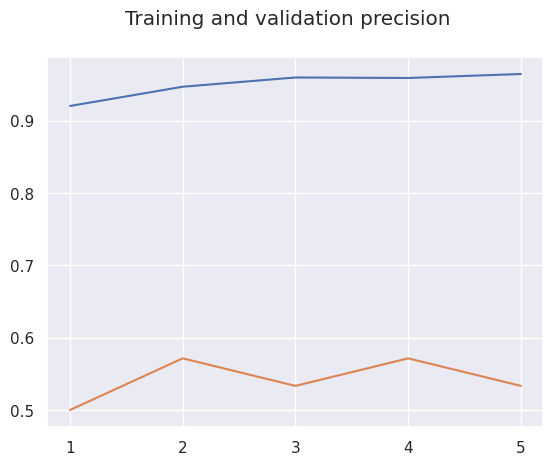

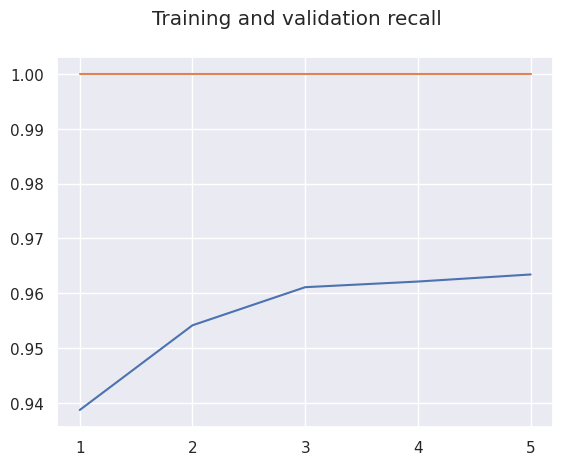

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(1, len(acc)+1) 

def metrics_charts(epochs, train_metrics, val_metrics, title):
    fig, axes = plt.subplots()
    axes.plot(epochs, train_metrics)
    axes.plot(epochs, val_metrics)
    axes.set_xticks(np.arange(1, len(epochs)+1))
    fig.suptitle('Training and validation' + ' ' + title)
    return fig

metrics_charts(epochs, acc, val_acc, 'accuracy')
metrics_charts(epochs, loss, val_loss, 'loss')
metrics_charts(epochs, precision, val_precision, 'precision')
metrics_charts(epochs, recall, val_recall, 'recall')